# **Group Exercise 1 - Data Preprocessing on a Real Dataset**

**Group Members:**

*   Simran Amesar
*   Shreya Chowdary Challagulla
*   Ishwari Thakur
*   Pooja Chandrappa
*   Yuvraj Ghag





In [ ]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, Lasso
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***Loading the Dataset***

In [ ]:
drive_path = "/content/drive/MyDrive/"
file_path = "/content/Statistics_ML_Datasets/healthcare-stroke_dataset.csv"

# Load dataset
df = pd.read_csv(file_path)

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
print("\nShape of dataset:", df.shape)


Shape of dataset: (5110, 12)


## **Handling Missing Values**

In [ ]:
print("\nMissing values per column:\n")
print(df.isnull().sum())


Missing values per column:

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


*Since the **bmi** column contains **201 missing values** and is a numerical feature with outliers, the missing values were imputed using the **median**. The **mean** was avoided as it is sensitive to outliers and could skew the data.*


In [ ]:
bmi_median = df['bmi'].median()
df['bmi'] = df['bmi'].fillna(bmi_median)
print(df.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


*The missing values in the **bmi** feature were imputed using the **median**, resulting in **zero missing values**.*


## **Scaling Numerical Features**

*We apply Z-score standardization and Min-Max normalization to numerical features.*


In [ ]:
scaler = StandardScaler()
df[['age_z', 'bmi_z', 'avg_glucose_z']] = scaler.fit_transform(
    df[['age', 'bmi', 'avg_glucose_level']]
)

In [ ]:
minmax = MinMaxScaler()
df[['age_mm', 'bmi_mm', 'avg_glucose_mm']] = minmax.fit_transform(
    df[['age', 'bmi', 'avg_glucose_level']]
)

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_z,bmi_z,avg_glucose_z,age_mm,bmi_mm,avg_glucose_mm
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1.051434,1.005086,2.706375,0.816895,0.301260,0.801265
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,0.786070,-0.098981,2.121559,0.743652,0.203895,0.679023
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1.626390,0.472536,-0.005028,0.975586,0.254296,0.234512
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0.255342,0.719327,1.437358,0.597168,0.276060,0.536008
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1.582163,-0.631531,1.501184,0.963379,0.156930,0.549349


*Z-score standardization and Min–Max normalization were applied to the features **age**, **avg_glucose_level**, and **bmi**, as they are numerical variables. The remaining features are categorical or unique and therefore were not scaled.*


## **Handling Noise**

In [ ]:
feature = 'avg_glucose_level'
original_data = df[feature].copy()

In [ ]:
np.random.seed(42)
noise = np.random.normal(0, 15, size=len(df))
noisy_data = original_data + noise

In [ ]:
smoothed_data = pd.Series(noisy_data).rolling(window=5, center=True).mean()

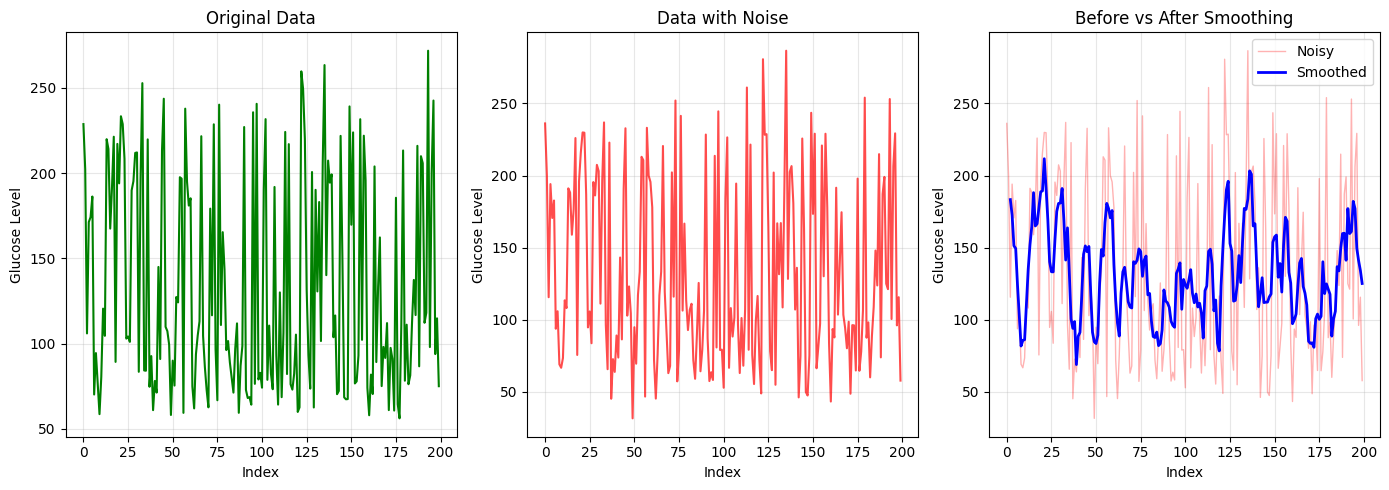

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.plot(original_data[:200], label='Original', color='green', linewidth=1.5)
plt.title('Original Data')
plt.xlabel('Index')
plt.ylabel('Glucose Level')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(noisy_data[:200], label='With Noise', color='red', linewidth=1.5, alpha=0.7)
plt.title('Data with Noise')
plt.xlabel('Index')
plt.ylabel('Glucose Level')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.plot(noisy_data[:200], label='Noisy', color='red', alpha=0.3, linewidth=1)
plt.plot(smoothed_data[:200], label='Smoothed', color='blue', linewidth=2)
plt.title('Before vs After Smoothing')
plt.xlabel('Index')
plt.ylabel('Glucose Level')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
print(f"Original mean: {original_data.mean():.2f}")
print(f"Noisy mean: {noisy_data.mean():.2f}")
print(f"Smoothed mean: {smoothed_data.mean():.2f}")
print(f"\nOriginal std: {original_data.std():.2f}")
print(f"Noisy std: {noisy_data.std():.2f}")
print(f"Smoothed std: {smoothed_data.std():.2f}")

Original mean: 106.15
Noisy mean: 106.24
Smoothed mean: 106.20

Original std: 45.28
Noisy std: 47.80
Smoothed std: 22.50


## **Handling Outliers**

In [ ]:
df.head(50)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_z,bmi_z,avg_glucose_z,age_mm,bmi_mm,avg_glucose_mm
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1.051434,1.005086,2.706375,0.816895,0.301260,0.801265
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,0.786070,-0.098981,2.121559,0.743652,0.203895,0.679023
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1.626390,0.472536,-0.005028,0.975586,0.254296,0.234512
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0.255342,0.719327,1.437358,0.597168,0.276060,0.536008
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1.582163,-0.631531,1.501184,0.963379,0.156930,0.549349
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,1.670617,0.017920,1.768195,0.987793,0.214204,0.605161
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,1.361026,-0.189904,-0.796342,0.902344,0.195876,0.069107
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1,1.139889,-0.787399,-0.259671,0.841309,0.143184,0.181285
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.1,Unknown,1,0.697615,-0.098981,-0.662506,0.719238,0.203895,0.097082
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,1.537935,-0.605553,-1.050764,0.951172,0.159221,0.015927


In [ ]:
A = df['avg_glucose_z']
B = df['age_z']
C = df['bmi_z']

outlier_A = df[abs(A) > 3]
outlier_B = df[abs(B) > 3]
outlier_C = df[abs(C) > 3]

display(outlier_A[['avg_glucose_level']].head())
display(outlier_B[['avg_glucose_level']].head())
display(outlier_C[['avg_glucose_level']].head())

,avg_glucose_level
33,252.72
45,243.58
122,259.63
123,249.31
135,263.32


,avg_glucose_level


,avg_glucose_level
113,224.10
258,205.84
270,129.54
333,82.24
358,78.40


 *As we can see there are no outliers in the AGE column.*

In [ ]:
df_after = df[abs(A) <= 3]
df_after = df_after[abs(B) <= 3]
df_after = df_after[abs(C) <= 3]
display(df_after.head(50))
display(df_after.head(115))


/tmp/ipython-input-4237715261.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_after = df_after[abs(B) <= 3]
/tmp/ipython-input-4237715261.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_after = df_after[abs(C) <= 3]


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_z,bmi_z,avg_glucose_z,age_mm,bmi_mm,avg_glucose_mm
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1.051434,1.005086,2.706375,0.816895,0.301260,0.801265
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,0.786070,-0.098981,2.121559,0.743652,0.203895,0.679023
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1.626390,0.472536,-0.005028,0.975586,0.254296,0.234512
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0.255342,0.719327,1.437358,0.597168,0.276060,0.536008
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1.582163,-0.631531,1.501184,0.963379,0.156930,0.549349
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,1.670617,0.017920,1.768195,0.987793,0.214204,0.605161
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,1.361026,-0.189904,-0.796342,0.902344,0.195876,0.069107
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1,1.139889,-0.787399,-0.259671,0.841309,0.143184,0.181285
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.1,Unknown,1,0.697615,-0.098981,-0.662506,0.719238,0.203895,0.097082
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,1.537935,-0.605553,-1.050764,0.951172,0.159221,0.015927


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_z,bmi_z,avg_glucose_z,age_mm,bmi_mm,avg_glucose_mm
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1.051434,1.005086,2.706375,0.816895,0.301260,0.801265
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,0.786070,-0.098981,2.121559,0.743652,0.203895,0.679023
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1.626390,0.472536,-0.005028,0.975586,0.254296,0.234512
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0.255342,0.719327,1.437358,0.597168,0.276060,0.536008
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1.582163,-0.631531,1.501184,0.963379,0.156930,0.549349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,36706,Female,76.0,0,0,Yes,Self-employed,Urban,106.41,28.1,formerly smoked,1,1.449481,-0.098981,0.005793,0.926758,0.203895,0.236774
114,71639,Female,68.0,0,0,No,Govt_job,Urban,82.10,27.1,Unknown,1,1.095662,-0.228871,-0.531098,0.829102,0.192440,0.124550
115,53401,Male,71.0,1,1,No,Govt_job,Rural,216.94,30.9,never smoked,1,1.228344,0.264712,2.446874,0.865723,0.235968,0.747022
116,60744,Male,61.0,1,0,Yes,Self-employed,Rural,76.11,27.3,smokes,1,0.786070,-0.202893,-0.663389,0.743652,0.194731,0.096898


*Outliers were removed rather than transformed because extreme values could disproportionately bias the model, and their removal improved data consistency, reduced skewness, and enhanced overall model performance.*

## **Feature Selection**

**Correlation**

In [ ]:
df[['age', 'bmi', 'avg_glucose_level']].corr()

,age,bmi,avg_glucose_level
age,1.000000,0.324296,0.238171
bmi,0.324296,1.000000,0.166876
avg_glucose_level,0.238171,0.166876,1.000000


*Selected the columns age, bmi, and avg_glucose_level from the dataset and computes the correlation between them.
The result shows how strongly each pair of variables is related, with values.*

**Regression**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X = df[['age', 'bmi', 'avg_glucose_level']]
y = df['stroke']

model = LinearRegression()
rfe = RFE(model, n_features_to_select=1)
rfe.fit(X, y)

pd.DataFrame({'Feature': X.columns, 'Selected': rfe.support_})

,Feature,Selected
0,age,True
1,bmi,False
2,avg_glucose_level,False


*To identify the most important feature for predicting stroke.*

**Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})

,Feature,Coefficient
0,age,0.001976
1,bmi,-0.000000
2,avg_glucose_level,0.000344


*To shrink less important feature coefficients toward zero.*